<h2>Analysis 2. Correlations between editing levels of edjacent editing sites</h2>
<p>We calculate the Pearson's correlation coefficient for various distances between editing sites</p>

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import re
import random
from editing_adlib import *
%matplotlib inline

In [7]:
def pearsonr_ci(x,y, verbose, alpha=0.05/10):
    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    if verbose:
        print(r, p, lo, hi, se)
    return r, p, lo, hi

def pearson_corr_arr(edsite_crd_dict, bin_arr, verbose=False):
    edlevel_dict = dict()
    for i in bin_arr:
        edlevel_dict[i] = []
    for seq_id in edsite_crd_dict.keys():
        edsite_crds = sorted(edsite_crd_dict[seq_id].keys())
        for i in range(len(edsite_crds) - 1):
            el1 = eval(edsite_crd_dict[seq_id][edsite_crds[i]][7])
            el2 = eval(edsite_crd_dict[seq_id][edsite_crds[i+1]][7])
            s_val = edsite_crds[i+1] - edsite_crds[i]
            for j in bin_arr:
                if j >= s_val:
                    edlevel_dict[j].append([el1,el2])
                    break
    cor_arr = []
    for i in bin_arr:
        if verbose:
            print(i)
        edlevel_dict[i] = np.array(edlevel_dict[i]).T
        try:
            p_cor = pearsonr_ci(edlevel_dict[i][0], edlevel_dict[i][1], verbose)
        except IndexError:
            p_cor = (0, 0, 0, 0)
#            p_cor = (np.nan, np.nan, np.nan, np.nan)
        cor_arr.append(p_cor)
#    print(cor_arr)
    return cor_arr

"""
def make_log_bin_arr(maxval, bin_num):
    log_bin_arr = []
    log_max = np.log10(maxval)
    r = log_max/bin_num
    for i in range(1, bin_num):
        val = 10**(r*i)
        log_bin_arr.append(val)
    return log_bin_arr
"""

def draw_correl(cor_arr, bin_arr, cutoff, fig_name = None):
    means = []
    low = []
    high = []
    for i in cor_arr[:-cutoff]:
        means.append(i[0])
        low.append(i[2])
        high.append(i[3])
    plt.plot(bin_arr[:-cutoff], means)
    plt.plot(bin_arr[:-cutoff], low)
    plt.plot(bin_arr[:-cutoff], high)
    plt.xscale('log')
    if fig_name:
        plt.savefig(fig_name)
    plt.show()

In [8]:
#bin_arr = make_log_bin_arr(10000, 20)
edsites_oct = read_edsite_crd_file("../data/editing_sites_oct_plus.txt", syn_nsyn = None)
edsites_bim = read_edsite_crd_file("../data/editing_sites_bim_plus.txt", syn_nsyn = None)
edsites_sep = read_edsite_crd_file("../data/editing_sites_sep_plus.txt", syn_nsyn = None)
edsites_squ = read_edsite_crd_file("../data/editing_sites_squ_plus.txt", syn_nsyn = None)

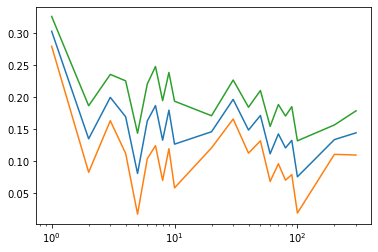

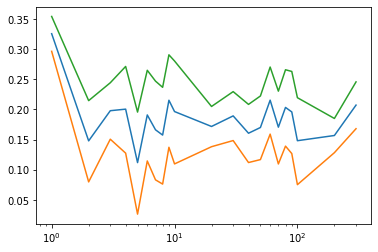

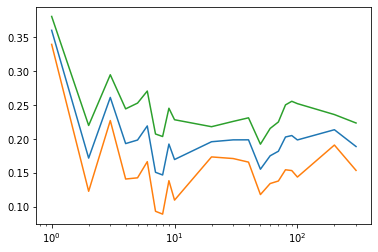

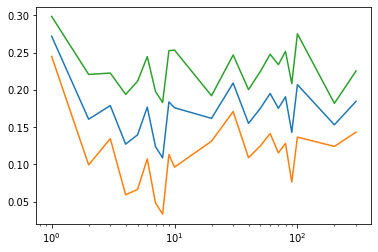

In [9]:
bin_arr = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300, np.inf]

cor_arr = pearson_corr_arr(edsites_oct, bin_arr)
draw_correl(cor_arr, bin_arr, 1, "../article/suppl_figures/An2_EL_corr/corr_EL_oct.pdf")

cor_arr = pearson_corr_arr(edsites_bim, bin_arr)
draw_correl(cor_arr, bin_arr, 1, "../article/suppl_figures/An2_EL_corr/corr_EL_bim.pdf")

cor_arr = pearson_corr_arr(edsites_sep, bin_arr)
draw_correl(cor_arr, bin_arr, 1, "../article/suppl_figures/An2_EL_corr/corr_EL_sep.pdf")

cor_arr = pearson_corr_arr(edsites_squ, bin_arr)
draw_correl(cor_arr, bin_arr, 1, "../article/suppl_figures/An2_EL_corr/corr_EL_squ.pdf")